# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [89]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
############### TEST SETS ##############################
from scripts import process_log as pl
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"

test = "d"

if test == "a":
    
    # Set the path to the file we would like to analyze
    pl.setLogPath("datasets/gc.log")
    pl.setLogSchema(1)
    
elif test == "b":
    
    pl.setLogPath("datasets/amzn_workload_4.log")
    pl.setLogSchema(0)
    
elif test == "c":
    
    pl.setLogPath("datasets/FLIGHT_GC.log")
    pl.setLogSchema(0)
    
elif test == "d":
    
    pl.setLogPath("datasets/long_amzn_workload.log")
    pl.setLogSchema(0)
    
elif test == "incomplete_test_concurrent_pauses":
    pl.setLogPath("datasets/long_a.log")
    pl.setLogSchema(0)

### Begin processing log information. Plots data and trends

Total pauses: 1110
Max wait: 181.425 ms
Total wait: 111792.804 ms
Average wait: 100.7142 ms
Total time: 3762.947
Total program runtime: 3762.947 seconds
Throughput: 97.0291%


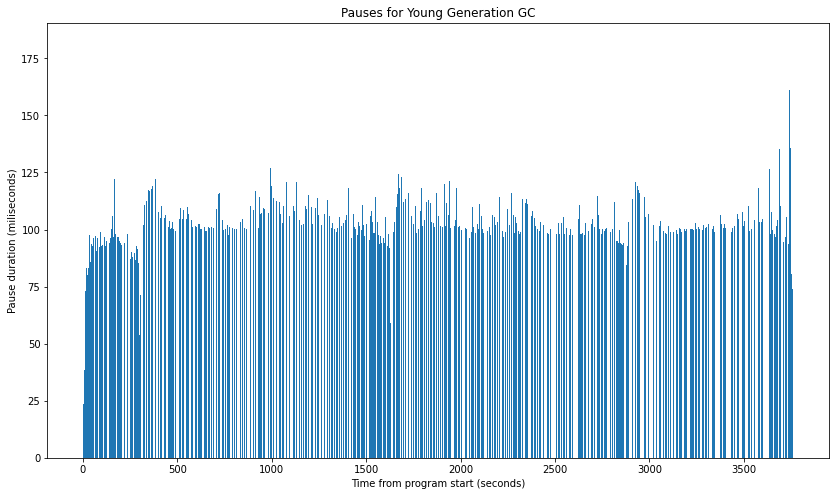

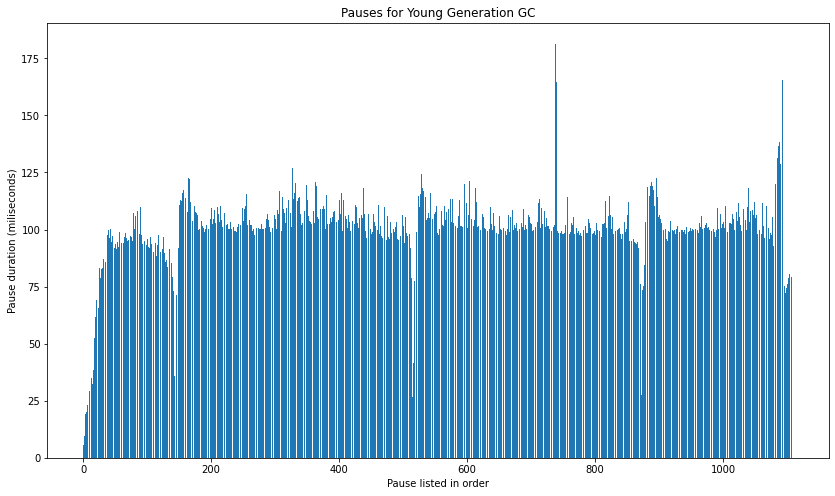

5


In [91]:
''' Begin processing log information into specific variables '''
from scripts import process_log as pl
from scripts import plot_data as dplt

# Get the pauses information from that file.
table_young_pauses = pl.getYoungPauses2(create_csv = False)
if len(table_young_pauses) > 0:
    # plot the data for pauses, printing to output the trends.
    dplt.plot_pauses(table_young_pauses)
    print(len(table_young_pauses))
else:
    print("No information recorded")

# To inspect more information about this, access the variable "table_ypauses"
# TODO: Transform second table into line graph

In [ ]:
''' Analyze heap allocation througout the program '''
from scripts import process_log as pl
from scripts import plot_data as dplt

#################################################
# IMPORTANT NOTE: THE CURRENT X AXIS IS NOT TIME!! (fix later)
#################################################
# remove the following 2 lines after testing.

heap_allocation_sections = pl.getHeapAllocation(create_csv = False)



if len(heap_allocation_sections) > 0:

    # plot the data for pauses, printing to output the trends.
    dplt.plot_heap_allocation_breakdown(heap_allocation_sections)
else:
    print("No log data collected")

#TODO: Fix formatting of table & color choices


1110
1110
1110
1110
1110
1110


###Below is just testing. Temporary below.

In [93]:
# Get all metadata about the specific gc used
gc_metadata = pl.getGCMetadata(create_csv = False)

# Create graphical table from metadata
dplt.tableMetadata(gc_metadata)

-------------------------------------------------------
Version . . . . . . . . . . . | 16.0.1+9 (release)
CPUs  . . . . . . . . . . . . | 16 total, 16 available
Memory  . . . . . . . . . . . | 65536M
Large Page Support  . . . . . | Disabled
NUMA Support  . . . . . . . . | Disabled
Compressed Oops . . . . . . . | Enabled (Zero based)
Heap Region Size  . . . . . . | 8M
Heap Min Capacity . . . . . . | 8M
Heap Initial Capacity . . . . | 1G
Heap Max Capacity . . . . . . | 16G
Pre-touch . . . . . . . . . . | Disabled
Parallel Workers  . . . . . . | 13
Concurrent Workers  . . . . . | 3
Concurrent Refinement Workers | 13
Periodic GC . . . . . . . . . | Disabled


## Below, I test and compare the results of Zulu vs. my runtime pauses.
#### While this probably will not be in the final version, it is helpful for the script to be easily accessible, and maybe live in an archive after I finish with it.

In [94]:
# In this cell, I hope to be able to analyze the difference between this data and Java/Zulu Flight Recorder
from scripts import zulu_output_process as zul
from scripts import process_log as pl


pl.setLogPath("datasets/long_amzn_workload.log") #temp
pl.setLogSchema(0)                               #temp



concurrent = pl.getConcurrentMarkPauses(create_csv = False)
print(concurrent, "\n\n")

# Then, accessing the data from Zulu flight recorder is more difficult.
# Therefore, manually put the zulu pause time information into a file specified by FILEP
def remove_s(item):
    return float(item[:-1])
mine = list(map(remove_s, table_young_pauses[0]))

#print(mine)
#rint(len(mine))
zulu = zul.extract_zulu_pauses("datasets/long_zulu_pauses.csv")
#rint(len(zulu))
#rint(len(zulu))
t = []
count = 0 #temp

for idx in range(min(len(zulu),len(mine))):
    t.append(float(zulu[idx]) - float(mine[idx]) )
    if (t[idx] * t[idx]) > 1:
        print(round(t[idx],3), " :  ", str(idx))
        print(float(zulu[idx]))
        print(float(mine[idx]))
        count +=1 
        if count == 3:
            break
        print(" ")

[['', '', '', '', '', ''], ['295.051s', '295.470s', '1620.864s', '1621.074s', '2862.794s', '2863.037s'], ['info ', 'info ', 'info ', 'info ', 'info ', 'info '], ['gc          ', 'gc          ', 'gc          ', 'gc          ', 'gc          ', 'gc          '], ['3125M->3125M(6360M)', '3125M->3125M(6360M)', '4910M->4838M(9640M)', '4838M->4838M(9640M)', '5093M->4773M(9640M)', '4824M->4824M(9640M)']] 


5.977  :   0
6.393
0.416
 
5.256  :   1
5.727
0.471
 
8.855  :   2
9.519
0.664


In [95]:
from scripts import process_log as pl


pl.setLogPath("datasets/long_amzn_workload.log") #temp
pl.setLogSchema(0)                               #temp

concurrent = pl.getConcurrentMarkPauses(False)
listdata = list(concurrent[4])

print(listdata)



['3125M->3125M(6360M)', '3125M->3125M(6360M)', '4910M->4838M(9640M)', '4838M->4838M(9640M)', '5093M->4773M(9640M)', '4824M->4824M(9640M)']


In [96]:
from scripts import process_log as pl
from scripts import plot_data as dplt

pl.setLogPath("datasets/long_amzn_workload.log")
pl.setLogSchema(0)

m = pl.getGCMetadata2(False)
dplt.displayMetadata(m)

Version . . . . . . . . . . . | 16.0.1+9 (release)
CPUs  . . . . . . . . . . . . | 16 total, 16 available
Memory  . . . . . . . . . . . | 65536M
Large Page Support  . . . . . | Disabled
NUMA Support  . . . . . . . . | Disabled
Compressed Oops . . . . . . . | Enabled (Zero based)
Pre-touch . . . . . . . . . . | Disabled
Parallel Workers  . . . . . . | 13
Heap Region Size  . . . . . . | 8M
Heap Initial Capacity . . . . | 1G
Heap Max Capacity . . . . . . | 16G
Heap Min Capacity . . . . . . | 8M
Concurrent Workers  . . . . . | 3
Concurrent Refinement Workers | 13
Periodic GC . . . . . . . . . | Disabled
